# Predict the Automobile Insurance claim

The purpose of an Insurance is to provide protection against the risk of any financial loss. Insurance is a form of risk management in which an insurer agrees to take the risk of the insured entity against future events, uncertain loss due to Tsunami, earthquake or damage against the vehicle or personal property. Here you will be provided with Automobile insurance claim dataset.

One has to predict the claim amount in the Automobile insurance dataset.



https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/Auto_Insurance_claims_amount.csv



And 



One has to predict the insurance fraud  in the Automobile insurance dataset.



https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/Automobile_insurance_fraud.csv

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Automobile_insurance_fraud.csv')

 Predict the claim Fraud in the Automobile insurance fraud dataset

In [3]:
df.head(10)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
5,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,...,NO,64100,6410,6410,51280,Saab,95,2003,Y,NaN
6,137,34,413978,04-06-2000,IN,250/500,1000,1333.35,0,441716,...,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N,NaN
7,165,37,429027,03-02-1990,IL,100/300,1000,1137.03,0,603195,...,YES,51590,9380,9380,32830,Audi,A5,2015,N,NaN
8,27,33,485665,05-02-1997,IL,100/300,500,1442.99,0,601734,...,YES,27700,2770,2770,22160,Toyota,Camry,2012,N,NaN
9,212,42,636550,25-07-2011,IL,100/300,500,1315.68,0,600983,...,?,42300,4700,4700,32900,Saab,92x,1996,N,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [5]:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['months_as_customer', 'age', 'policy_number', 'policy_deductable',
        'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss',
        'incident_hour_of_the_day', 'number_of_vehicles_involved',
        'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim',
        'property_claim', 'vehicle_claim', 'auto_year'],
       dtype='object'),
 dtype('float64'): Index(['policy_annual_premium', '_c39'], dtype='object'),
 dtype('O'): Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex',
        'insured_education_level', 'insured_occupation', 'insured_hobbies',
        'insured_relationship', 'incident_date', 'incident_type',
        'collision_type', 'incident_severity', 'authorities_contacted',
        'incident_state', 'incident_city', 'incident_location',
        'property_damage', 'police_report_available', 'auto_make', 'auto_model',
        'fraud_reported'],
       dtype='object')}

In [6]:
df.shape

(1000, 40)

In [7]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [8]:
#checking for missing values in data
df = df.replace({'?':np.NaN})
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [9]:
df=df.drop(['_c39'],axis=1)

df['collision_type'].fillna(df['collision_type'].mode()[0], inplace=True)

df['property_damage'].fillna(df['property_damage'].mode()[0], inplace=True)

df['police_report_available'].fillna(df['police_report_available'].mode()[0], inplace=True)

In [10]:
#checking for missing values in data
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

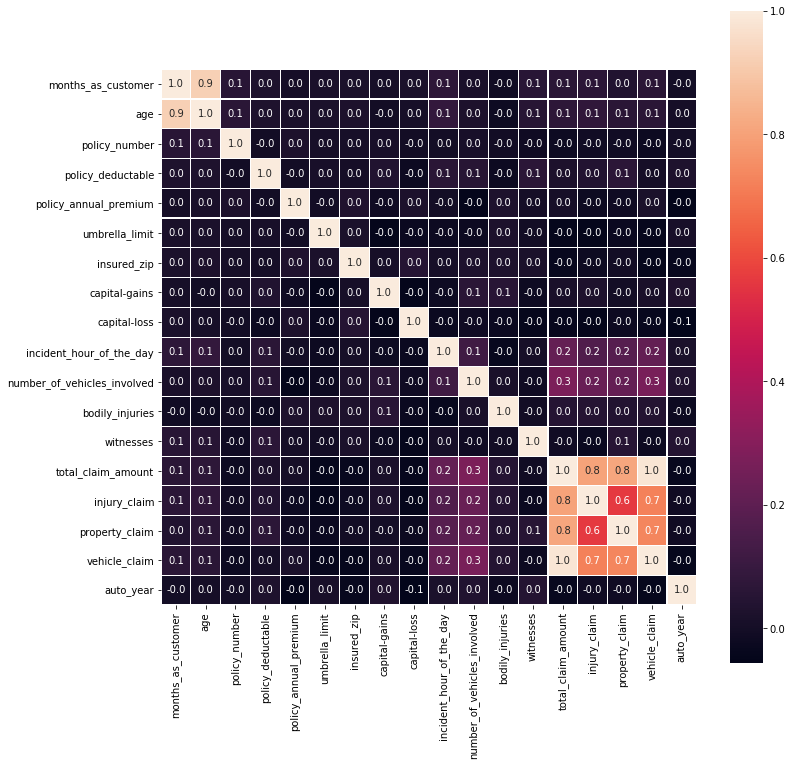

In [11]:
#Check Out Correlation
f,ax = plt.subplots(figsize = (12, 12))
sns.heatmap(df.corr(), annot = True, linewidths = 0.1, fmt = '.1f', ax = ax, square = True)

In [12]:
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

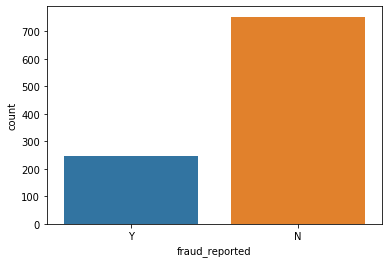

In [13]:
sns.countplot(x='fraud_reported',data=df)

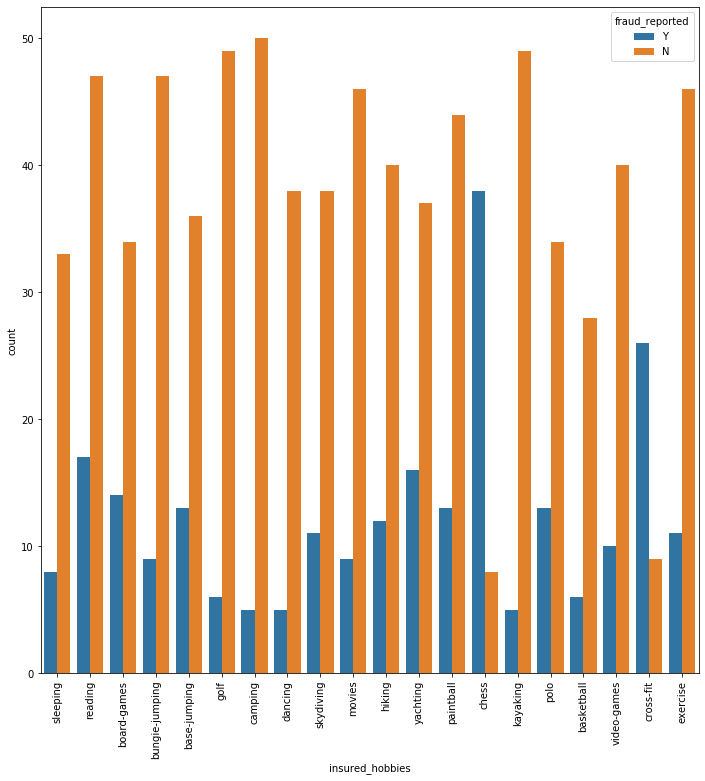

In [14]:
fig = plt.figure(figsize=(10,10))
sns.countplot(x='insured_hobbies',data=df,hue='fraud_reported')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

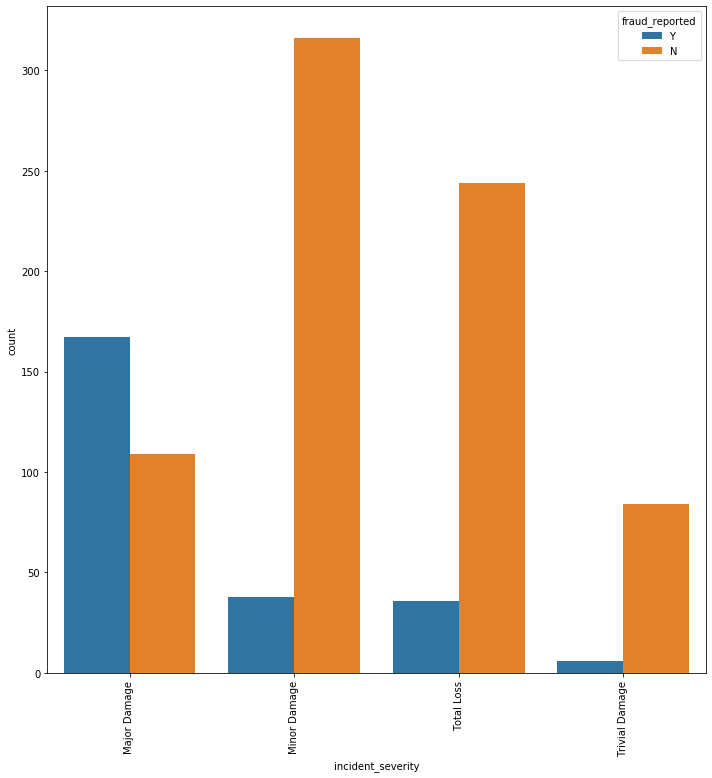

In [15]:
fig = plt.figure(figsize=(10,10))
sns.countplot(x='incident_severity',data=df,hue='fraud_reported')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

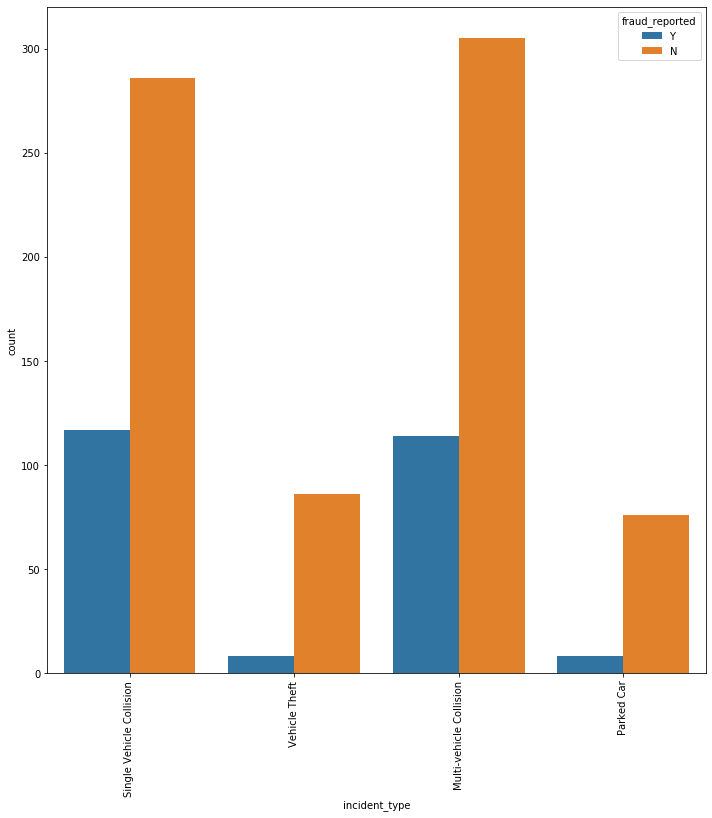

In [16]:
fig = plt.figure(figsize=(10,10))
sns.countplot(x='incident_type',data=df,hue='fraud_reported')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

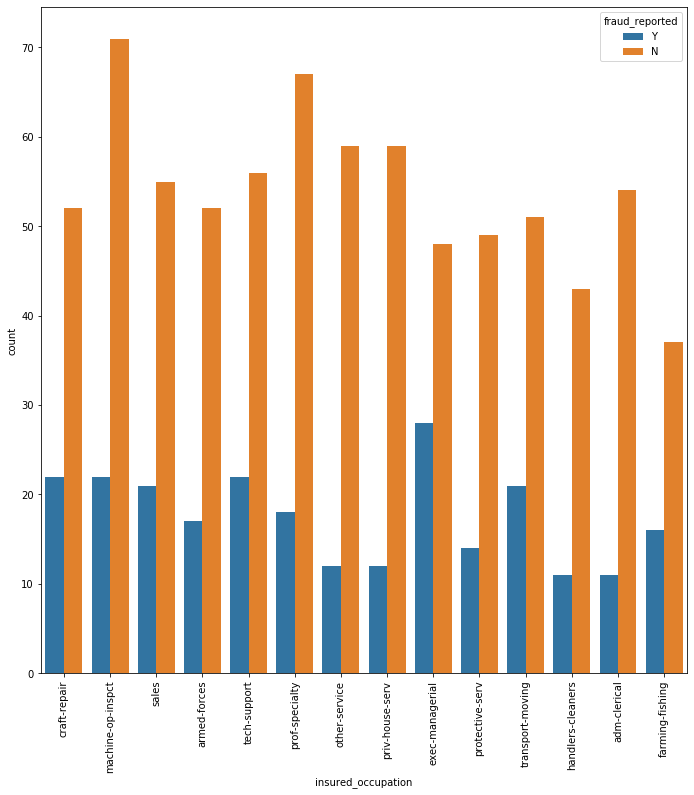

In [17]:
fig = plt.figure(figsize=(10,10))
sns.countplot(x='insured_occupation',data=df,hue='fraud_reported')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

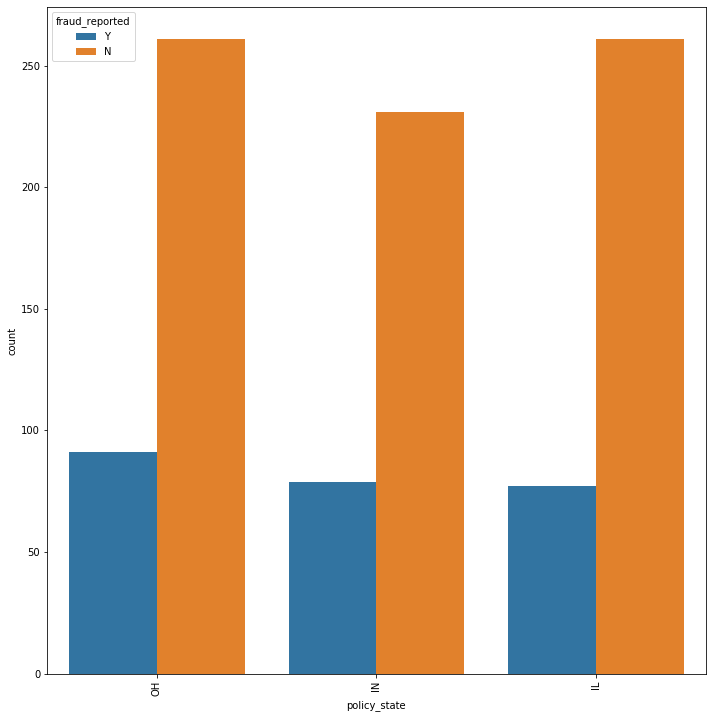

In [18]:
fig = plt.figure(figsize=(10,10))
sns.countplot(x='policy_state',data=df,hue='fraud_reported')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

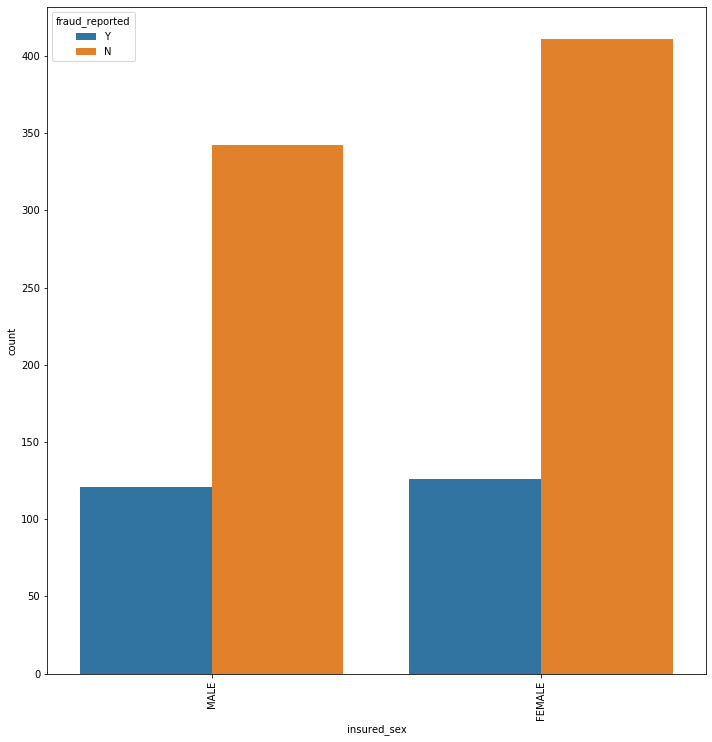

In [19]:
fig = plt.figure(figsize=(10,10))
sns.countplot(x='insured_sex',data=df,hue='fraud_reported')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

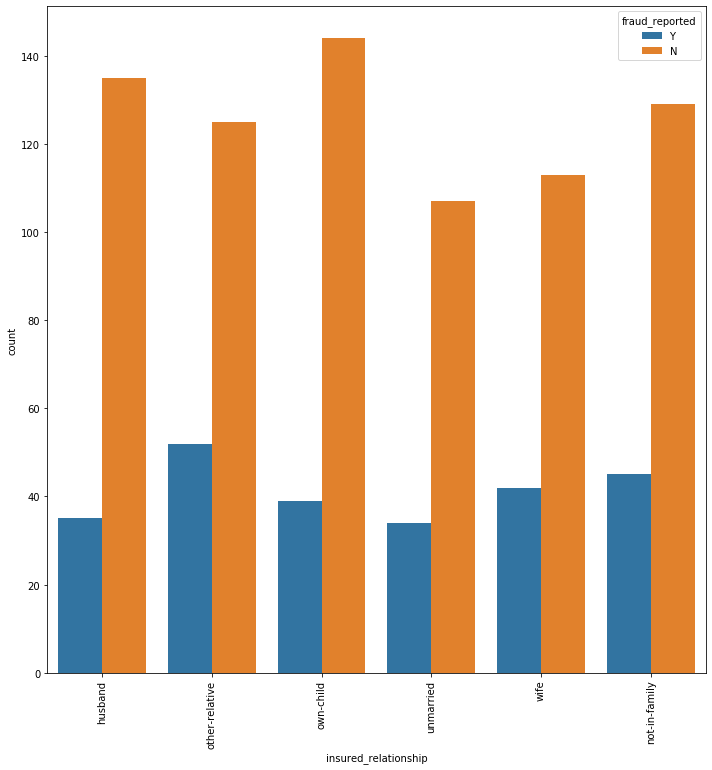

In [20]:
fig = plt.figure(figsize=(10,10))
sns.countplot(x='insured_relationship',data=df,hue='fraud_reported')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

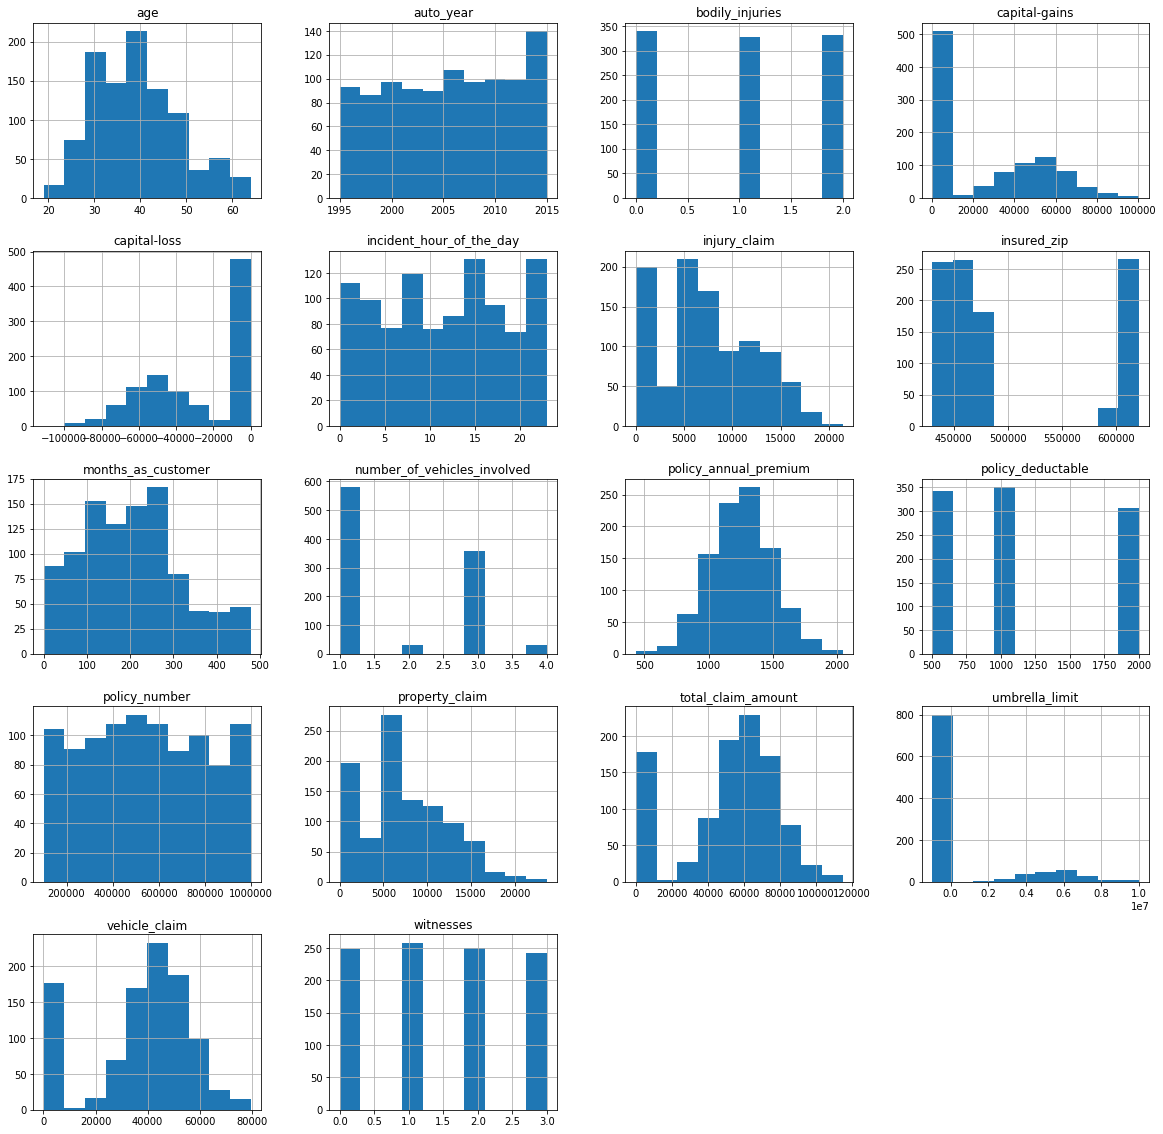

In [21]:
df.hist(figsize=(20,20))
plt.show()

In [22]:
df['fraud_reported'] = df['fraud_reported'].replace(('Y','N'),(0,1))


In [23]:
df_new = pd.get_dummies(df.drop('policy_bind_date', axis = 1))
df_new.head()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,...,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6
0,328,48,521585,1000,1406.91,0,466132,53300,0,5,...,0,0,0,0,0,0,0,0,0,0
1,228,42,342868,2000,1197.22,5000000,468176,0,0,8,...,0,0,0,0,0,0,0,0,0,0
2,134,29,687698,2000,1413.14,5000000,430632,35100,0,7,...,0,1,0,0,0,0,0,0,0,0
3,256,41,227811,2000,1415.74,6000000,608117,48900,-62400,5,...,0,0,0,0,0,1,0,0,0,0
4,228,44,367455,1000,1583.91,6000000,610706,66000,-46000,20,...,0,0,1,0,0,0,0,0,0,0


In [24]:
Y = df_new['fraud_reported']
x = df_new.drop('fraud_reported', axis = 1)


In [25]:
x = pd.DataFrame(x,columns=x.columns)
#x.head()

In [26]:
#Prediction - Classification Algorithms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [27]:
#Split the data into train and test set for classifcation predictions

from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,Y,test_size=0.3,random_state=9,stratify=Y)
x_train.shape, y_train.shape, x_test.shape

((700, 1220), (700,), (300, 1220))

In [28]:
KNN=KNeighborsClassifier(n_neighbors=6)
SV=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=6)
GNB=GaussianNB()
RFC=RandomForestClassifier(n_estimators=1000,random_state=0)

In [29]:
models=[]
models.append(('KNeighborsClassifier',KNN))
models.append(('SVC',SV))
models.append(('LogisticRegression',LR))
models.append(('GaussianNB',GNB))
models.append(('RandomForestClassifier',RFC))

In [30]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

############################### KNeighborsClassifier ##################################

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')


Accuracy_score=  0.6733333333333333


Cross_val_score= 0.6649999999999998


roc_auc_score=  0.49689069600574026


classification_report
               precision    recall  f1-score   support

           0       0.24      0.15      0.18        74
           1       0.75      0.85      0.80       226

    accuracy                           0.67       300
   macro avg       0.50      0.50      0.49       300
weighted avg       0.63      0.67      0.64       300
 

Confusion Matrix
 [[ 11  63]
 [ 35 191]] 




############################### SVC ##################################

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', ker

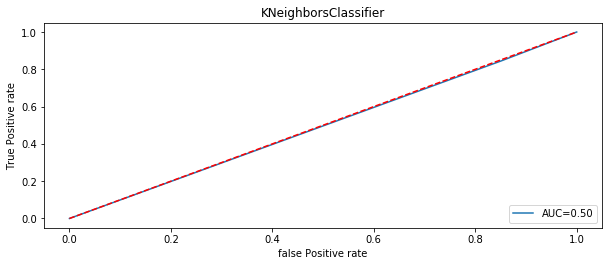

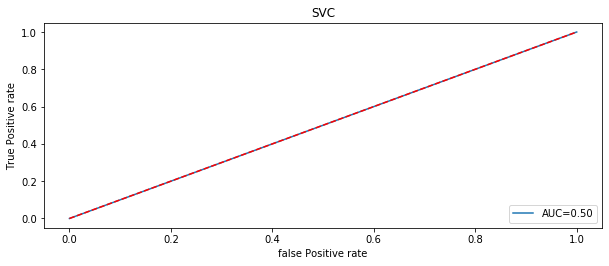

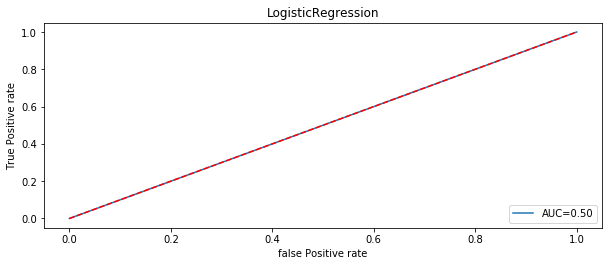

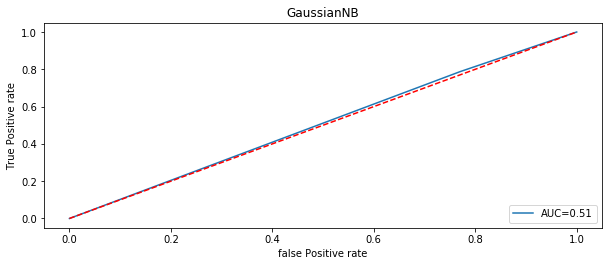

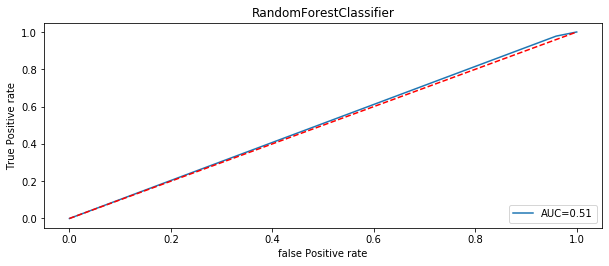

In [31]:
Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print('###############################',name,'##################################\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score= ',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,Y,cv=10,scoring='accuracy').mean()
    print('Cross_val_score=',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score= ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre),'\n')
    cm=confusion_matrix(y_test,pre)
    print('Confusion Matrix\n',cm,'\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC=%0.2f'%roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive rate')
    plt.xlabel('false Positive rate')
    print('\n\n')

In [32]:
result=pd.DataFrame({'Model':Model,'Accuracy_score':score,'Cross_val_score':cvs,'Roc_auc_curve':rocscore})
result

,Model,Accuracy_score,Cross_val_score,Roc_auc_curve
0,KNeighborsClassifier,67.333333,66.5,49.689070
1,SVC,75.333333,75.3,50.000000
2,LogisticRegression,75.333333,75.3,50.000000
3,GaussianNB,65.000000,67.6,50.867017
4,RandomForestClassifier,74.666667,75.0,50.920832


In [37]:
from sklearn.externals import joblib
joblib.dump(RFC,'Model_Fraud_Prediction.obj')

['Model_Fraud_Prediction.obj']

In [38]:
model=joblib.load('Model_Fraud_Prediction.obj')

In [39]:
result=pd.DataFrame(model.predict(x_test))

In [40]:
result.to_csv('Fraud_prdictresults.csv')